# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [8]:
# read in json to DataFrame: json_df
json_df = pd.read_json('data/world_bank_projects.json')

# extract 'countryname' column and apply .value_counts(), slicing top for 10 and print result
df_top_countries = pd.DataFrame(json_df['countryname'].value_counts()[:10]).reset_index()

# fix columns of df_top_countries
df_top_countries.columns = ['country','project count']
print(df_top_countries)

                           country  project count
0            Republic of Indonesia             19
1       People's Republic of China             19
2    Socialist Republic of Vietnam             17
3                Republic of India             16
4                Republic of Yemen             13
5                            Nepal             12
6               Kingdom of Morocco             12
7  People's Republic of Bangladesh             12
8           Republic of Mozambique             11
9                           Africa             11


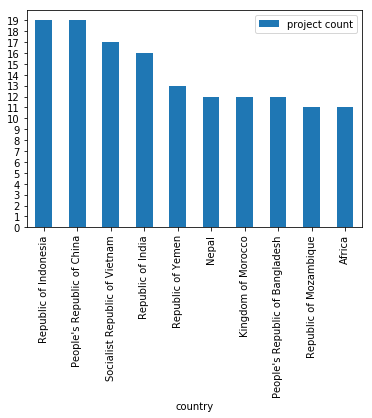

In [9]:
# visualizing the top 10 countries
import matplotlib.pyplot as plt

df_top_countries.plot(kind='bar', x='country', y='project count')
plt.yticks(range(20))
plt.show()

In [10]:
# load json data file as string: json_text
with open('data/world_bank_projects.json') as file:
    json_text = json.load(file)

# normalize json_text to create table from nested element 'mjtheme_namecode'    
df_normalized_json = json_normalize(json_text, 'mjtheme_namecode')

# calculate value counts and save as DataFrame: results
df_results = pd.DataFrame(df_normalized_json.code.value_counts()).reset_index()
df_results.columns = ['code', 'count']

import numpy as np

# write column-wise function to converty empty strings to NaN
def empty_string_to_nan(string):
    '''returns NaN value if string is empty'''
    if string == "":
        string = np.nan
    return string

# apply function down the 'name' column to mark empty strings as NaN
df_normalized_json['name'] = df_normalized_json['name'].apply(empty_string_to_nan)

# create DataFrame with 2 columns for 'code' and 'name'
df_namecodes = df_normalized_json.dropna().drop_duplicates()

# merge DataFrames to correlate count with theme name
df_top_themes = pd.merge(left=df_results, right=df_namecodes)

# print top 10 major project themes
print(df_top_themes[:10])

  code  count                                          name
0   11    250  Environment and natural resources management
1   10    216                             Rural development
2    8    210                             Human development
3    2    199                      Public sector governance
4    6    168         Social protection and risk management
5    4    146      Financial and private sector development
6    7    130                   Social dev/gender/inclusion
7    5     77                         Trade and integration
8    9     50                             Urban development
9    1     38                           Economic management


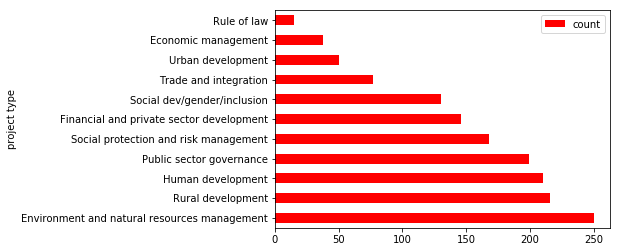

In [11]:
# visualizing top project themse

# convert 'count' column to type int
df_top_themes['count'] = df_top_themes['count'].astype(int)
df_top_themes.plot(kind='barh', color='red', x='name', y='count')
plt.ylabel('project type')
plt.show()

In [12]:
# set index of df_namecodes for use in filling missing values from json_df
df_namecodes = df_namecodes.set_index('code')

# write function to replace missing namecodes in json_df
def fill_namecode(namecodes):
    '''for each rows set of namecodes, fill in missing name values'''
    # loop over list of namecodes in 'mjtheme_namecode' column
    for pair in namecodes:
        if pair['name'] == '':
            pair['name'] = df_namecodes['name'][pair['code']]
    
    # return the filled-in namecodes list; NOTE: this may not be correct
    return namecodes

# apply fill_namecode function down 'mjtheme_namecode' column of json_df
json_df['mjtheme_namecode'] = json_df['mjtheme_namecode'].apply(fill_namecode)

# print first 50 values of 'mjtheme_namecode' column to show no missing 'name' values
print(json_df.mjtheme_namecode.head(50))

0     [{'code': '8', 'name': 'Human development'}, {...
1     [{'code': '1', 'name': 'Economic management'},...
2     [{'code': '5', 'name': 'Trade and integration'...
3     [{'code': '7', 'name': 'Social dev/gender/incl...
4     [{'code': '5', 'name': 'Trade and integration'...
5     [{'code': '6', 'name': 'Social protection and ...
6     [{'code': '2', 'name': 'Public sector governan...
7     [{'code': '11', 'name': 'Environment and natur...
8     [{'code': '10', 'name': 'Rural development'}, ...
9     [{'code': '2', 'name': 'Public sector governan...
10    [{'code': '10', 'name': 'Rural development'}, ...
11    [{'code': '10', 'name': 'Rural development'}, ...
12    [{'code': '4', 'name': 'Financial and private ...
13    [{'code': '5', 'name': 'Trade and integration'...
14    [{'code': '6', 'name': 'Social protection and ...
15    [{'code': '10', 'name': 'Rural development'}, ...
16    [{'code': '10', 'name': 'Rural development'}, ...
17    [{'code': '8', 'name': 'Human development'